In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

In [53]:
workouts = pd.read_csv("Workout Tracker.csv")
workouts.head()

,Date,Muscle,Exercise,Set 1,Set 2,Set 3,Set 4
0,24/09/2024,Chest,Smith Machine Incline Bench,25*10,25*9,25*8,25*7
1,24/09/2024,Shoulders,Dumbbell Lateral Raises,10*10,10*10,10*10,10*10
2,24/09/2024,Triceps,French Dumbbell Press,22*12,22*10,22*8,22*8
3,24/09/2024,Chest,Dumbbell Flys,12*8,12*8,12*8,NaN
4,26/09/2024,Biceps,Arm Curl Machine,41*10,41*10,41*8,41*8


In [54]:
workouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      67 non-null     object
 1   Muscle    67 non-null     object
 2   Exercise  67 non-null     object
 3   Set 1     66 non-null     object
 4   Set 2     66 non-null     object
 5   Set 3     64 non-null     object
 6   Set 4     35 non-null     object
dtypes: object(7)
memory usage: 3.8+ KB


In [55]:
unique_exercises = workouts['Exercise'].unique()
print(unique_exercises)

['Smith Machine Incline Bench' 'Dumbbell Lateral Raises'
 'French Dumbbell Press' 'Dumbbell Flys' 'Arm Curl Machine'
 'Triceps Pushdown' 'Dumbbell Curls ' 'Overhead Tricep Cable' 'Crunches'
 'Lateral Pulldowns' 'Barbell Row' 'Cable Pullover' 'Cable Row' 'RDL'
 'Seated Calf Raises' 'Hack Squat' 'Leg Extensions'
 'Incline Dumbbell Press' 'Machine Flys' 'Prone Leg Curl' 'Squat'
 'Converging Chest Press' 'Leg Press'
 'Back Lower Left Pulled during final set of RDLs'
 'Incline Smith Machine Press' 'Cable Lateral Raises' 'Cable Flys'
 'Triceps Pushdown (dif)' 'Dumbbell Curls']


In [56]:
melted_workouts = workouts.melt(id_vars=["Date", "Muscle", "Exercise"], 
                                value_vars=["Set 1", "Set 2", "Set 3", "Set 4"], 
                                var_name="Set", 
                                value_name="Reps")

melted_workouts.sort_values(by="Date", inplace=True)
melted_workouts.dropna(subset=["Reps"], inplace=True)
melted_workouts.head()

,Date,Muscle,Exercise,Set,Reps
133,01/11/2024,Abs,Crunches,Set 2,18
64,01/11/2024,Back,Lateral Pulldowns,Set 1,54.3*8
65,01/11/2024,Biceps,Arm Curl Machine,Set 1,36*10
66,01/11/2024,Abs,Crunches,Set 1,20
129,01/11/2024,Back,Cable Pullover,Set 2,21.6*12


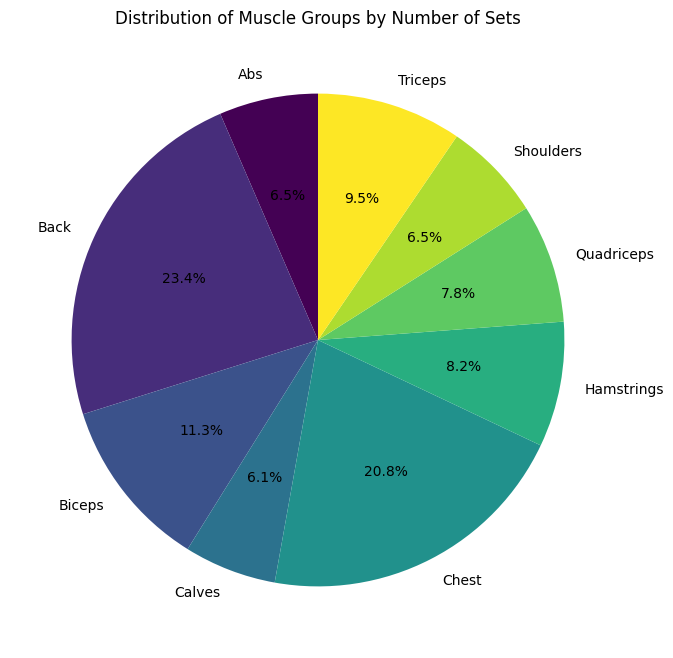

In [57]:
muscle_sets = melted_workouts.groupby("Muscle").size()

plt.figure(figsize=(8, 8))
muscle_sets.plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title("Distribution of Muscle Groups by Number of Sets") 
plt.show()

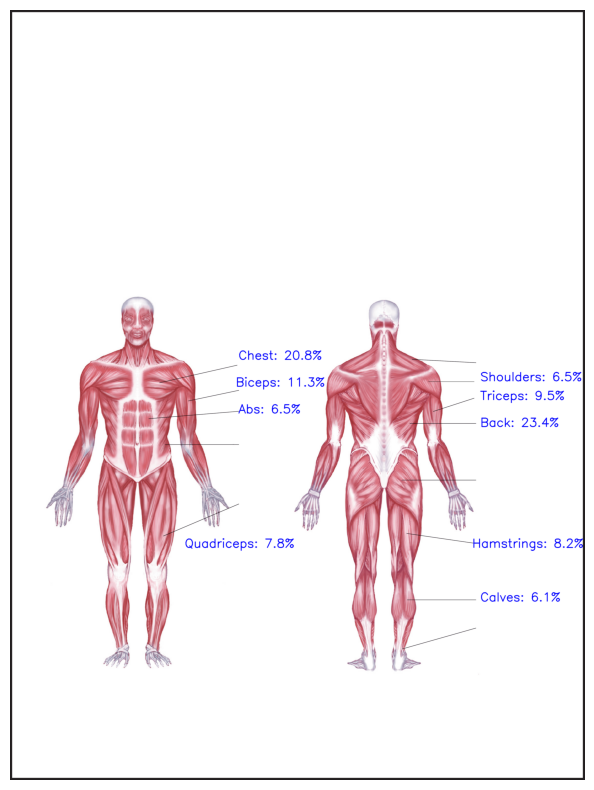

In [58]:
muscle_percentages = (muscle_sets / muscle_sets.sum()) * 100

image = cv2.imread("human_body.png")

positions = {
    "Chest": (850, 1300),
    "Back": (1750, 1550),
    "Biceps": (840, 1400),
    "Quadriceps": (650, 2000),
    "Shoulders": (1750, 1380),
    "Triceps": (1750, 1450),
    "Abs": (850, 1500),
    "Hamstrings": (1720, 2000),
    "Calves": (1750, 2200),
}

for muscle, percentage in muscle_percentages.items():
    position = positions.get(muscle, (50, 50)) 
    text = f"{muscle}: {percentage:.1f}%"
    cv2.putText(image, text, position, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 2, cv2.LINE_AA)  

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

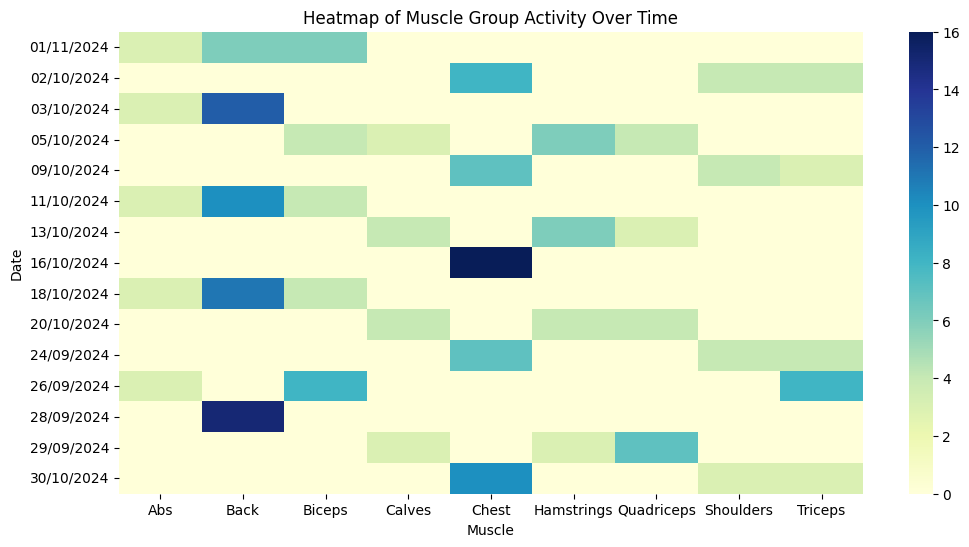

In [59]:
muscle_heatmap_data = melted_workouts.groupby(['Date', 'Muscle']).size().unstack().fillna(0).sort_index(ascending=True)
plt.figure(figsize=(12, 6))
sns.heatmap(muscle_heatmap_data, cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Muscle Group Activity Over Time")
plt.xlabel("Muscle")
plt.ylabel("Date")
plt.show()

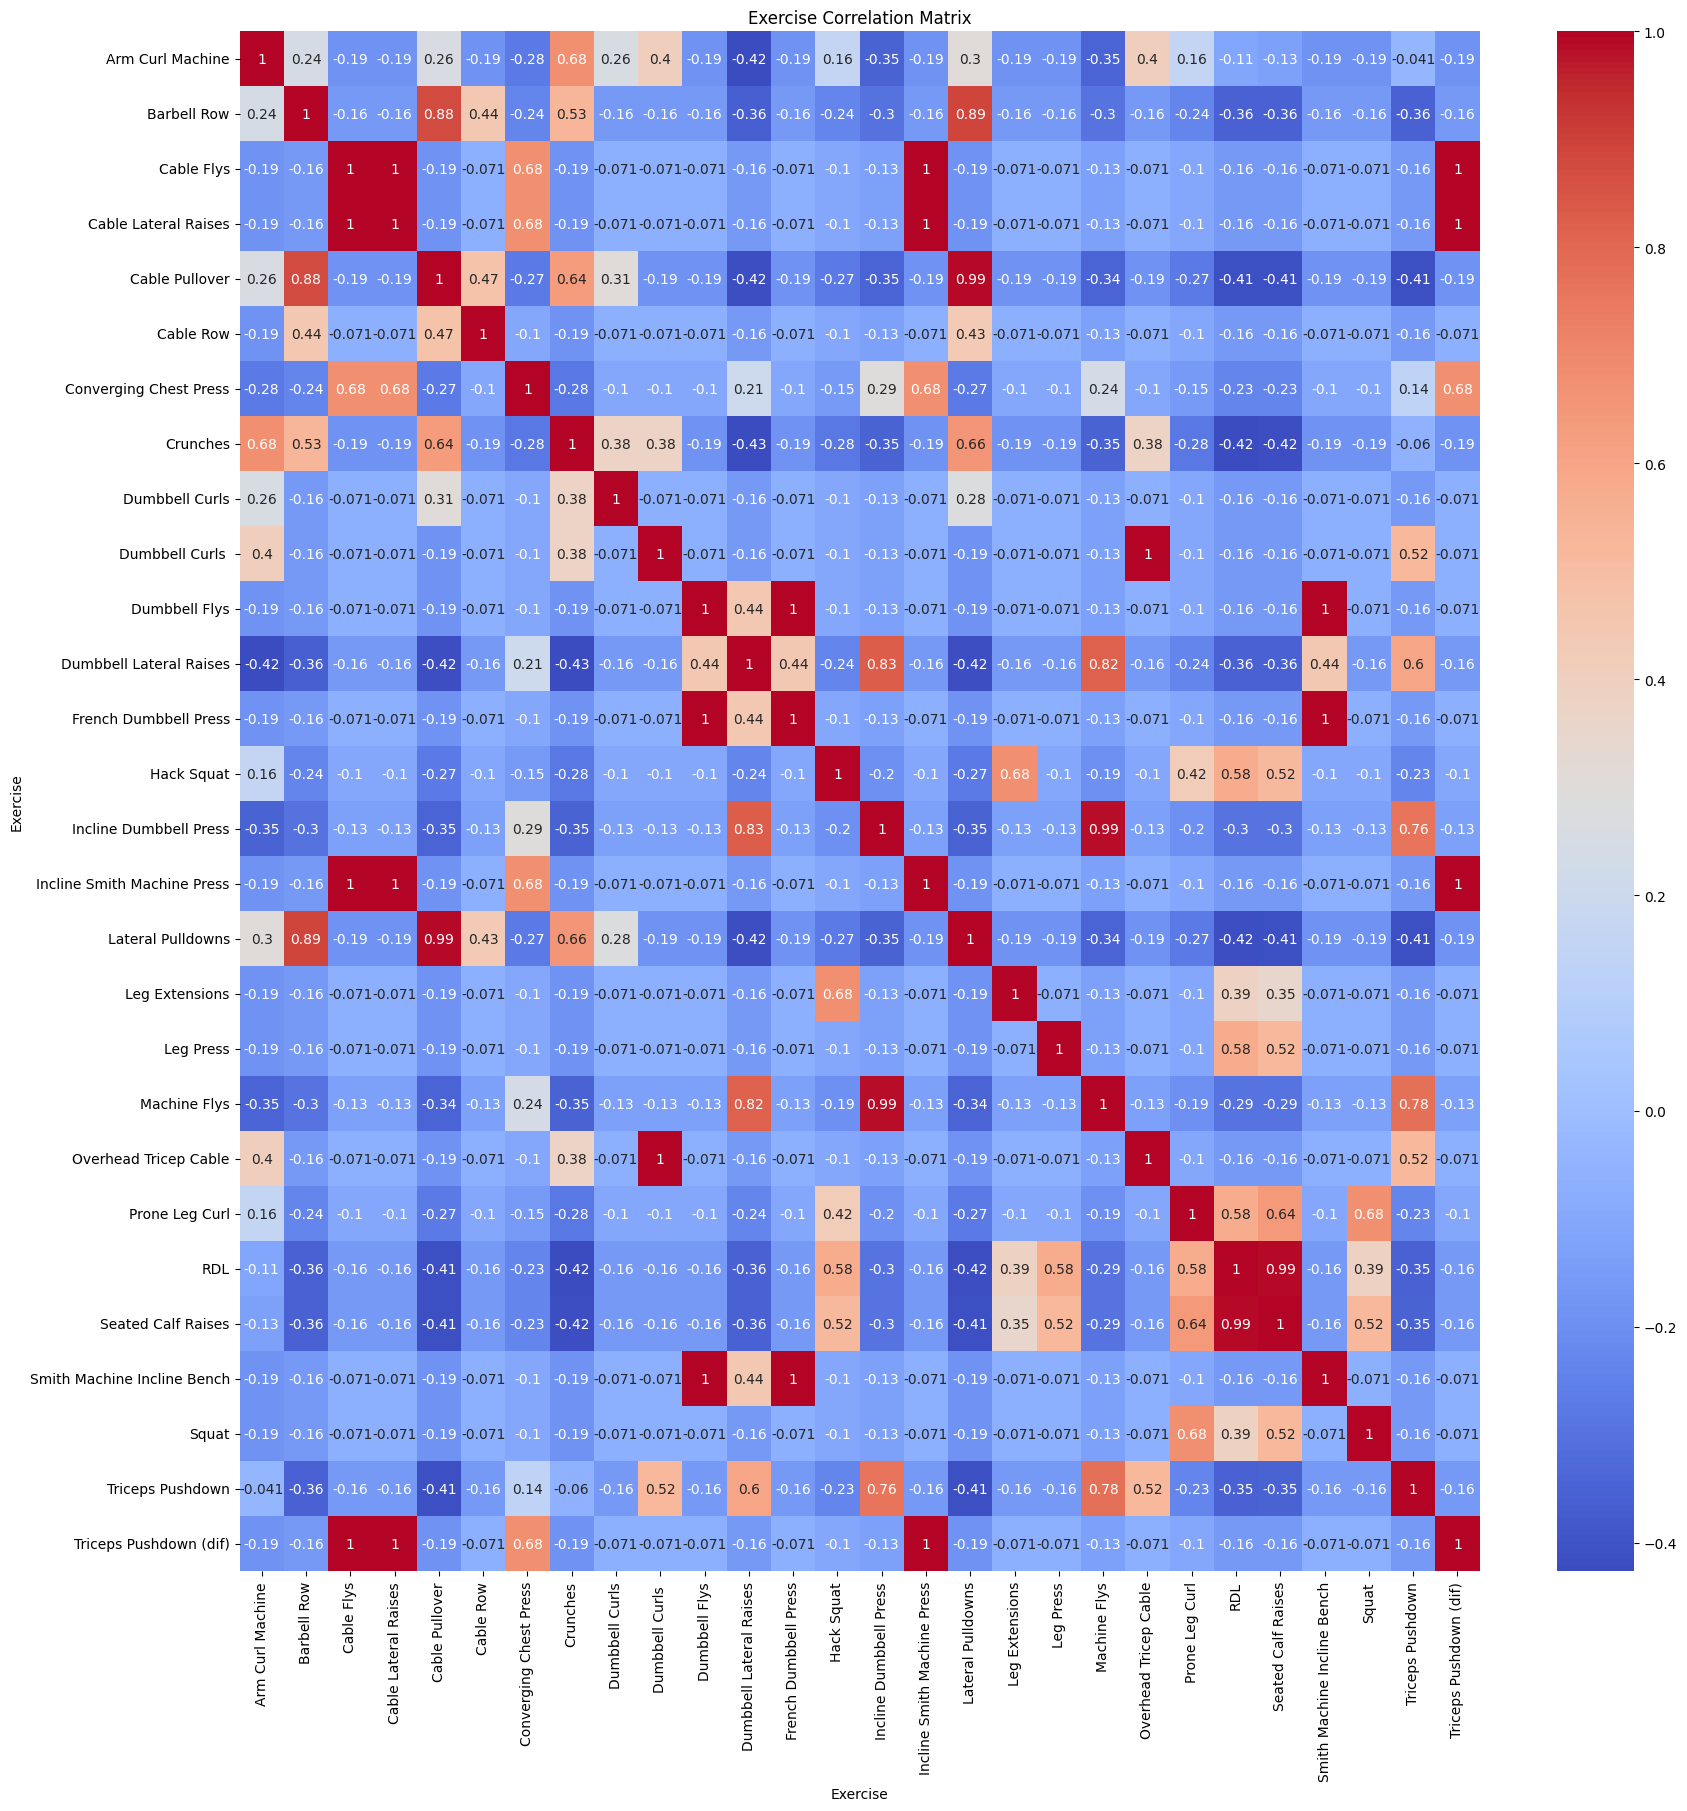

In [60]:
# This looks at which exercises are most often done together

exercise_correlation = pd.crosstab(melted_workouts['Date'], melted_workouts['Exercise'])
corr_matrix = exercise_correlation.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Exercise Correlation Matrix")
plt.show()

C:\Users\matth\AppData\Local\Temp\ipykernel_124028\1825907462.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  workouts['Date'] = pd.to_datetime(workouts['Date'])


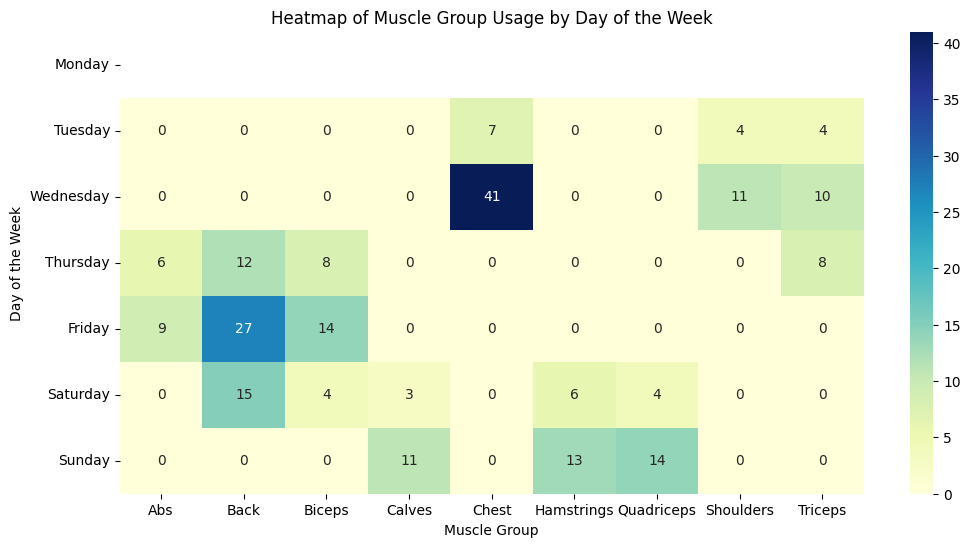

In [61]:
workouts['Date'] = pd.to_datetime(workouts['Date'])

workouts['Day of Week'] = workouts['Date'].dt.day_name()

melted_workouts = workouts.melt(id_vars=["Date", "Muscle", "Exercise", "Day of Week"], 
                                value_vars=["Set 1", "Set 2", "Set 3", "Set 4"], 
                                var_name="Set", 
                                value_name="Reps")

melted_workouts.dropna(subset=["Reps"], inplace=True)

muscle_by_day = melted_workouts.groupby(['Day of Week', 'Muscle']).size().unstack().fillna(0)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
muscle_by_day = muscle_by_day.reindex(day_order)

plt.figure(figsize=(12, 6))
sns.heatmap(muscle_by_day, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Heatmap of Muscle Group Usage by Day of the Week")
plt.ylabel("Day of the Week")
plt.xlabel("Muscle Group")
plt.show()

C:\Users\matth\AppData\Local\Temp\ipykernel_124028\2526800521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set1_workouts['Weight'] = set1_workouts['Reps'].str.extract(r'(\d+\.?\d*)').astype(float)
C:\Users\matth\AppData\Local\Temp\ipykernel_124028\2526800521.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exercise_weights.fillna(method='ffill', inplace=True)
C:\Users\matth\AppData\Local\Temp\ipykernel_124028\2526800521.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exercise_weights.fillna(method='bfill', inplace=True)


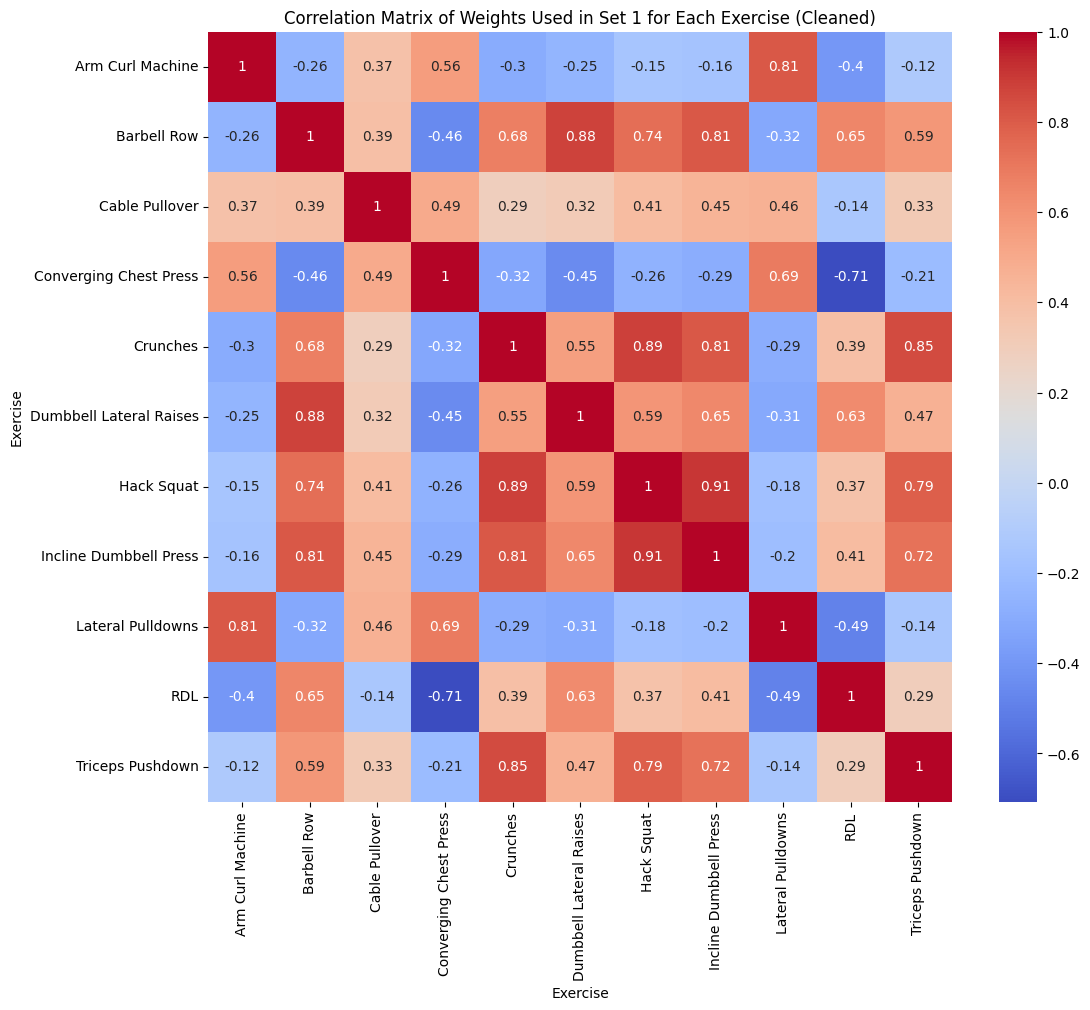

In [ ]:
set1_workouts = melted_workouts[melted_workouts['Set'] == 'Set 1']
set1_workouts['Weight'] = set1_workouts['Reps'].str.extract(r'(\d+\.?\d*)').astype(float)

exercise_weights = set1_workouts.pivot(columns='Exercise', values='Weight')

exercise_weights.fillna(method='ffill', inplace=True)
exercise_weights.fillna(method='bfill', inplace=True)
constant_columns = [col for col in exercise_weights.columns if exercise_weights[col].nunique() <= 1]

exercise_weights_cleaned = exercise_weights.drop(columns=constant_columns)

correlation_matrix_cleaned = exercise_weights_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Weights Used in Set 1 for Each Exercise (Cleaned)")
plt.show()

In [73]:
exercise_weights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 0 to 66
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Arm Curl Machine             66 non-null     float64
 1   Barbell Row                  66 non-null     float64
 2   Cable Flys                   66 non-null     float64
 3   Cable Lateral Raises         66 non-null     float64
 4   Cable Pullover               66 non-null     float64
 5   Cable Row                    66 non-null     float64
 6   Converging Chest Press       66 non-null     float64
 7   Crunches                     66 non-null     float64
 8   Dumbbell Curls               66 non-null     float64
 9   Dumbbell Curls               66 non-null     float64
 10  Dumbbell Flys                66 non-null     float64
 11  Dumbbell Lateral Raises      66 non-null     float64
 12  French Dumbbell Press        66 non-null     float64
 13  Hack Squat                 